### Flight Delay Analysis
In this notebook, we will analyze and visualize flight delay data for different airlines. The primary objectives are to identify the cause of delays for each flight, and to examine how delays vary over time for different airlines. We will explore the most common delay causes and investigate which airline experiences the highest number of delays.


This dataset provides detailed information on flight arrivals and delays for U.S. airports, categorized by carriers. 

**Dataset Feature Description**<br/>

year: The year of the data.<br/>
month: The month of the data.<br/>
carrier: Carrier code.<br/>
carrier_name: Carrier name.<br/>
airport: Airport code.<br/>
airport_name: Airport name.<br/>
arr_flights: Number of arriving flights.<br/>
arr_del15: Number of flights delayed by 15 minutes or more.<br/>
carrier_ct: Carrier count (delay due to the carrier).<br/>
weather_ct: Weather count (delay due to weather).<br/>
nas_ct: NAS (National Airspace System) count (delay due to the NAS).<br/>
security_ct: Security count (delay due to security).
late_aircraft_ct: Late aircraft count (delay due to late aircraft arrival).<br/>
arr_cancelled: Number of flights canceled.<br/>
arr_diverted: Number of flights diverted.<br/>
arr_delay: The total delay of a flight at its destination, including all contributing factors (carrier, weather, NAS, security, late aircraft)<br/>
Carrier Delay: Delays caused by the airline itself, such as mechanical issues, staffing problems, or operational inefficiencies.<br/>
Weather Delay: Delays caused by adverse weather conditions, including storms, fog, snow, or other weather-related disruptions.<br/>
NAS (National Airspace System) Delay: Delays caused by air traffic control or other airspace-related issues, such as congestion or restrictions in the national airspace.<br/>
Security Delay: Delays due to security-related issues, including passenger screening or airport security procedures.<br/>
Late Aircraft Delay: Delays caused by incoming aircraft arriving late, which affects subsequent flights.<br/>

You can access the dataset for this analysis on [Kaggle here](https://www.kaggle.com/datasets/sriharshaeedala/airline-delay)




In [1]:
# ! pip install plotly

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Update the file path to match your local system
# Example: df = pd.read_csv("./Airline_Delay_Cause.csv") if the file is in the same directory
# Or use the full correct path to your file
df = pd.read_csv("Airline_Delay_Cause.csv")  # Adjust path as needed for your system

In [6]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [7]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

Since arr_delay is the sum of all other delays (carrier delay, weather delay, NAS delay, security delay, late aircraft delay), it is indeed redundant if you already have the individual delay columns. Dropping it would make sense as it doesn't add new information beyond the already existing columns.



In [8]:
df.drop(columns='arr_delay', inplace=True)

In [9]:
df.shape

(171666, 20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  carrier_delay    

In [11]:
df.isna().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64

In [12]:
df['year'].min(), df['year'].max()

(np.int64(2013), np.int64(2023))

In [13]:
df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))

In [14]:
# check if any rows are duplcate
df[df.duplicated()]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year_month


In [15]:
# unique values count in each categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}': {df[col].unique().shape}, {len(set(df[col].unique()))}")


Unique values in 'carrier': (21,), 21

Unique values in 'carrier_name': (23,), 23

Unique values in 'airport': (395,), 395

Unique values in 'airport_name': (419,), 419


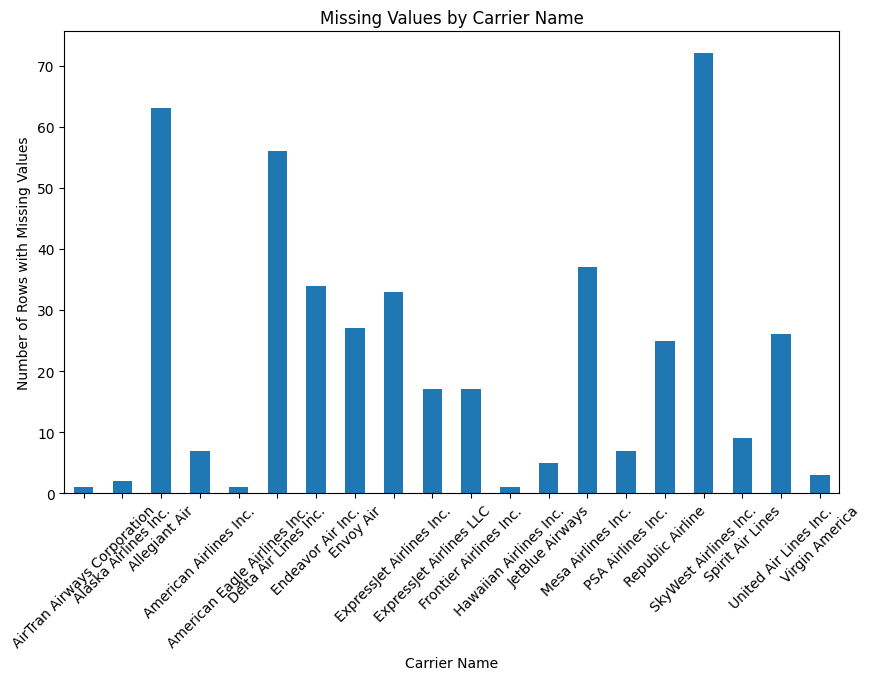

In [16]:
# see which carrier_name have highest number of missing values
carrier_name_msng_val = df[df.isnull().any(axis=1)].groupby('carrier_name').size()

carrier_name_msng_val.plot(kind='bar', figsize=(10, 6))
plt.title('Missing Values by Carrier Name')
plt.xlabel('Carrier Name')
plt.ylabel('Number of Rows with Missing Values')
plt.xticks(rotation=45)
plt.show()


In [17]:
# percentage of missging values in the dataset
for col in df.columns:
    if df[col].isna().sum() > 0:
        missing_percentage = (df[col].isnull().sum() / len(df)) * 100
        print(f"Percentage of missing values fo {col}: {missing_percentage:.2f}%")

Percentage of missing values fo arr_flights: 0.14%
Percentage of missing values fo arr_del15: 0.26%
Percentage of missing values fo carrier_ct: 0.14%
Percentage of missing values fo weather_ct: 0.14%
Percentage of missing values fo nas_ct: 0.14%
Percentage of missing values fo security_ct: 0.14%
Percentage of missing values fo late_aircraft_ct: 0.14%
Percentage of missing values fo arr_cancelled: 0.14%
Percentage of missing values fo arr_diverted: 0.14%
Percentage of missing values fo carrier_delay: 0.14%
Percentage of missing values fo weather_delay: 0.14%
Percentage of missing values fo nas_delay: 0.14%
Percentage of missing values fo security_delay: 0.14%
Percentage of missing values fo late_aircraft_delay: 0.14%


Since the percentage of missing values for most of the columns are relatively low, which is not even 1%, so we can drop the rows with missing values. <br/>

You can even consider a case where there was almost 25% of the values are missing, then in such scenarios, you could try to impute the missing values using various imputation techniques based on the datatype and the nature of the columnn. For example: in our dataset, for delay-related columns (`carrier_delay`,`security_delay`, `late_aircraft_delay`), missing values might imply no delays, so replacing with 0 could be appropriate. And for count-related columns (`arr_flights`, `carrier_ct`, etc.), use the median or mean of the column or group by airline (carrier_name) to impute more contextually. But always remember to investingate the values of that particular column before shoosing imputation strategy.

In [18]:
# 3 dropping rows with nan values
df.dropna(inplace=True)

### Delays Over Time by Carrier

Here we groups the dataset by `year_month` and `carrier_name`, summing the number of delays (`arr_del15`) greater than 15 minutes for each carrier per month. The result is plotted to show the trend of delays over time for each airline. 

In [19]:
delays_by_carrier = df.groupby(['year_month', 'carrier_name'])['arr_del15'].sum().reset_index()

fig = px.line(delays_by_carrier, x='year_month', y='arr_del15', color='carrier_name', 
              title='Delays over for each airlines',
              labels={'year_month': 'Year-Month', 'arr_del15': 'Number of Delays (15+ minutes)', 'carrier_name': 'Carrier Name'})

fig.show()

`SouthWest Airlines Co.` has consistently had the highest number of delays over time, as shown in the plot of delays across different date.


In [20]:
numerical_columns = df.select_dtypes(include='number')
# exclude 'year', 'month', and 'year_month' columns
numerical_columns = numerical_columns.drop(columns=['year', 'month', 'year_month'], errors='ignore').columns
numerical_columns

Index(['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

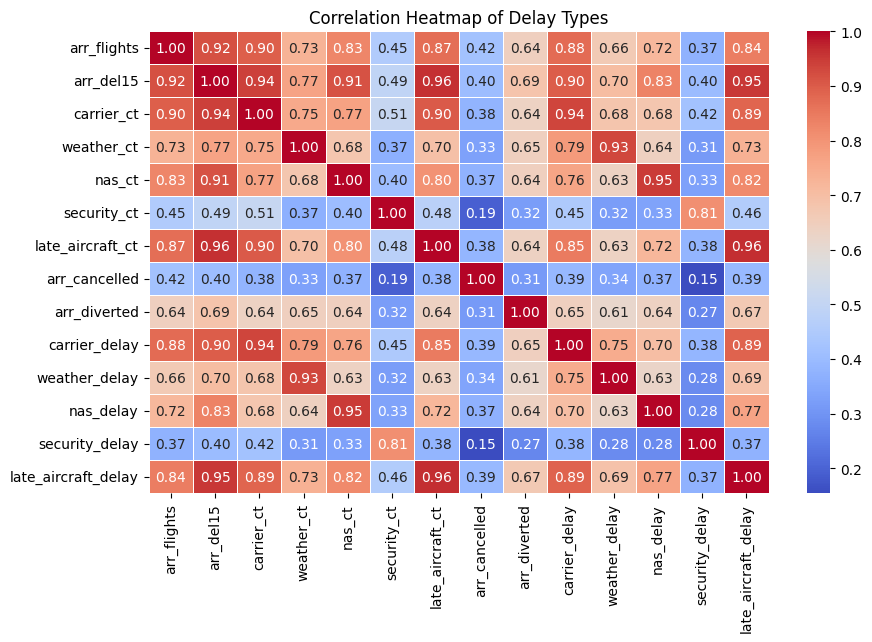

In [21]:
delay_corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(delay_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Delay Types')
plt.show()

Since the columns like `carrier_ct`, `weather_ct`, `nas_ct`, `security_ct`, and `late_aircraft_ct` provide the same information as `carrier_delay`, `weather_delay`, `nas_delay`, `security_delay`, and `late_aircraft_delay` respectively, and exhibit high correlation with these delay duration columns, they are considered redundant. Therefore, we can drop these columns from the DataFrame to eliminate redundancy.

In [22]:
# dropping the redundant columns
columns_to_drop = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
df.drop(columns=columns_to_drop, inplace=True)

In [23]:
numerical_columns = [col for col in numerical_columns if col not in columns_to_drop]
numerical_columns

['arr_flights',
 'arr_del15',
 'arr_cancelled',
 'arr_diverted',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay']

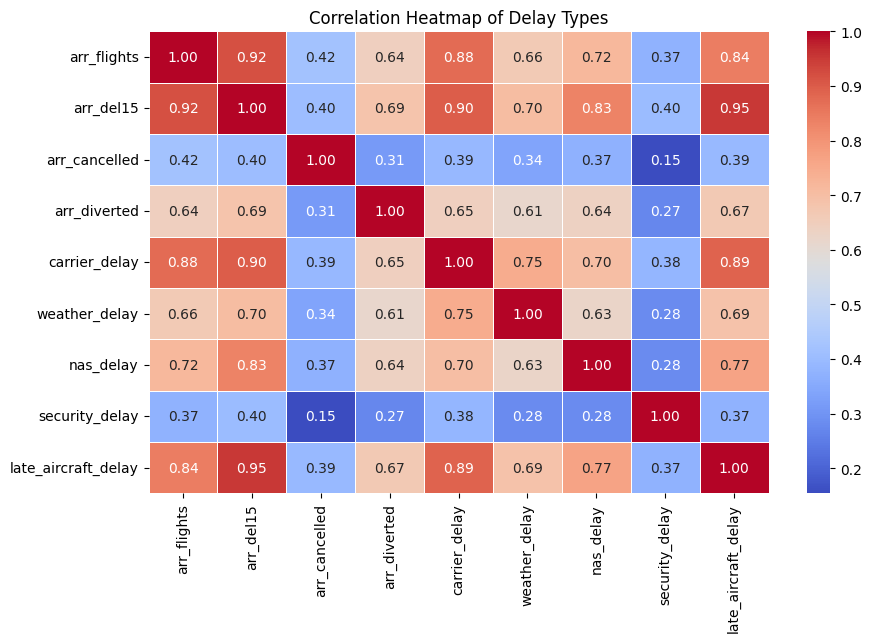

In [24]:
delay_corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(delay_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Delay Types')
plt.show()

### Find the Primary Cause of Delay for Each Flight

For each flight, the primary cause of delay is determined by comparing the values in the different delay columns. The delay column with the highest value is selected as the primary cause. This helps identify whether the delay is mainly due to factors such as the carrier, weather, national airspace system (NAS), security, or late aircraft arrival.


In [25]:
# find airlines with the most flight delay
df['total_delay'] = df['carrier_delay'] + df['weather_delay'] + df['nas_delay'] + df['security_delay'] + df['late_aircraft_delay']
carrier_delays = df.groupby('carrier_name')['total_delay'].sum().sort_values(ascending=False)
top5_airlines_with_delay = carrier_delays.head(5).index

print(top5_airlines_with_delay)

Index(['Southwest Airlines Co.', 'American Airlines Inc.',
       'SkyWest Airlines Inc.', 'Delta Air Lines Inc.',
       'United Air Lines Inc.'],
      dtype='object', name='carrier_name')


In [26]:
# fnd the primary cause of the delay for each flight 
def get_delay_cause_for_each_flight(row):
    delay_dict = {
        'carrier_delay': row['carrier_delay'],
        'weather_delay': row['weather_delay'],
        'nas_delay': row['nas_delay'],
        'security_delay': row['security_delay'],
        'late_aircraft_delay': row['late_aircraft_delay']
    }

    return max(delay_dict, key=delay_dict.get)

In [27]:
df['delay_cause_for_each_flight'] = df.apply(get_delay_cause_for_each_flight, axis=1)

In [29]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year_month,total_delay,delay_cause_for_each_flight
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.0,1.0,71.0,761.0,118.0,0.0,425.0,2023-08-01,1375.0,weather_delay
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,0.0,1.0,218.0,1.0,62.0,0.0,518.0,2023-08-01,799.0,late_aircraft_delay
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,1.0,0.0,56.0,188.0,78.0,0.0,444.0,2023-08-01,766.0,late_aircraft_delay
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,1.0,1.0,471.0,320.0,388.0,0.0,218.0,2023-08-01,1397.0,carrier_delay
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,2.0,0.0,628.0,0.0,134.0,0.0,768.0,2023-08-01,1530.0,late_aircraft_delay


### Identifying the Primary Cause of Delay for Each Airline

In this task, we are grouping the dataset by airline and calculating the primary cause of delay for each airline. For each airline, the delay columns are compared, and the one with the highest value is selected as the primary cause of delay. This approach allows us to determine the most common delay cause (e.g., `carrier_delay`, `weather_delay`, etc.) for each airline..


In [30]:
# find the primary cause of the delay for each airlines company
def get_delay_cause_grouped(group):
    # sum up delay values for each delay type for that particular airline
    total_delay = group[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()
    
    delay_dict = {
        'carrier_delay': total_delay['carrier_delay'],
        'weather_delay': total_delay['weather_delay'],
        'nas_delay': total_delay['nas_delay'],
        'security_delay': total_delay['security_delay'],
        'late_aircraft_delay': total_delay['late_aircraft_delay']
    }
    
    return max(delay_dict, key=delay_dict.get)


delay_causes_by_airline = df.groupby('carrier_name').apply(get_delay_cause_grouped)


In [31]:
delay_causes_by_airline

carrier_name
AirTran Airways Corporation     late_aircraft_delay
Alaska Airlines Inc.            late_aircraft_delay
Allegiant Air                   late_aircraft_delay
American Airlines Inc.          late_aircraft_delay
American Eagle Airlines Inc.    late_aircraft_delay
Delta Air Lines Inc.                  carrier_delay
Endeavor Air Inc.               late_aircraft_delay
Envoy Air                       late_aircraft_delay
ExpressJet Airlines Inc.        late_aircraft_delay
ExpressJet Airlines LLC                   nas_delay
Frontier Airlines Inc.          late_aircraft_delay
Hawaiian Airlines Inc.                carrier_delay
Horizon Air                     late_aircraft_delay
JetBlue Airways                 late_aircraft_delay
Mesa Airlines Inc.              late_aircraft_delay
PSA Airlines Inc.               late_aircraft_delay
Republic Airline                late_aircraft_delay
SkyWest Airlines Inc.                 carrier_delay
Southwest Airlines Co.          late_aircraft_delay

The above statistics show that `late_aircraft_delay` is the most common primary cause of delay for most airlines. However, `carrier_delay` is the primary cause for `Delta Air Lines Inc.`, `Hawaiian Airlines Inc.`, `US Airways Inc.`, and `SkyWest Airlines Inc`., while `nas_delay` is the reason for delays in `ExpressJet Airlines LLC`, `Spirit Air Lines` and `Virgin America`.